### Reinforcement Learning Project 
### SARSA with different Variations
#### 10 X 10 Maze Environment



In [9]:
import gym
import maze_env
import numpy as np
import matplotlib.pyplot as plt

##### Initializing the Maze environment

In [10]:
env = maze_env.MazeEnvRandom10x10(enable_render=False)
NUM_ACTIONS = env.action_space.n  
print("Number of actions: ", NUM_ACTIONS)
STATE_BOUNDS = list(zip(env.observation_space.low, env.observation_space.high))
print("State Bounds:",STATE_BOUNDS)
print("Observation Space: ", env.observation_space)
print("Maze Size: ", env.maze_size)
print("Initial State: ", env.state)

MAZE_SIZE = tuple((env.observation_space.high + np.ones(env.observation_space.shape)).astype(int))
NUM_BUCKETS = MAZE_SIZE 
print("Number of buckets: ", NUM_BUCKETS)

Number of actions:  4
State Bounds: [(0, 9), (0, 9)]
Observation Space:  Box(0, 9, (2,), int64)
Maze Size:  (10, 10)
Initial State:  [0. 0.]
Number of buckets:  (10, 10)


Environment:
- The agent may only choose to go up, down, right, or left ("N", "S", "E", "W"). If the way is blocked, it will remain at the same the location.
- The observation space is the (x, y) coordinate of the agent. The top left cell is (0, 0).
- A reward of 1 is given when the agent reaches the goal. For every step in the maze, the agent recieves a reward of -0.1/(number of cells).
- The maze is reset when the agent reaches the goal.

## Baseline SARSA

Episode 0 - Steps: 638, Reward: 0.36299999999999955, Success: True
Episode 1 - Steps: 1808, Reward: -0.8069999999999118, Success: True
Episode 2 - Steps: 1655, Reward: -0.6539999999999286, Success: True
Episode 3 - Steps: 1261, Reward: -0.25999999999997203, Success: True
Episode 4 - Steps: 1430, Reward: -0.4289999999999534, Success: True
Episode 5 - Steps: 1015, Reward: -0.013999999999999124, Success: True
Episode 6 - Steps: 1203, Reward: -0.20199999999997842, Success: True
Episode 7 - Steps: 1115, Reward: -0.11399999999998811, Success: True
Episode 8 - Steps: 975, Reward: 0.025999999999999246, Success: True
Episode 9 - Steps: 499, Reward: 0.5019999999999996, Success: True
Episode 10 - Steps: 876, Reward: 0.12499999999999933, Success: True
Episode 11 - Steps: 602, Reward: 0.3989999999999996, Success: True
Episode 12 - Steps: 696, Reward: 0.3049999999999995, Success: True
Episode 13 - Steps: 688, Reward: 0.3129999999999995, Success: True
Episode 14 - Steps: 506, Reward: 0.49499999999999

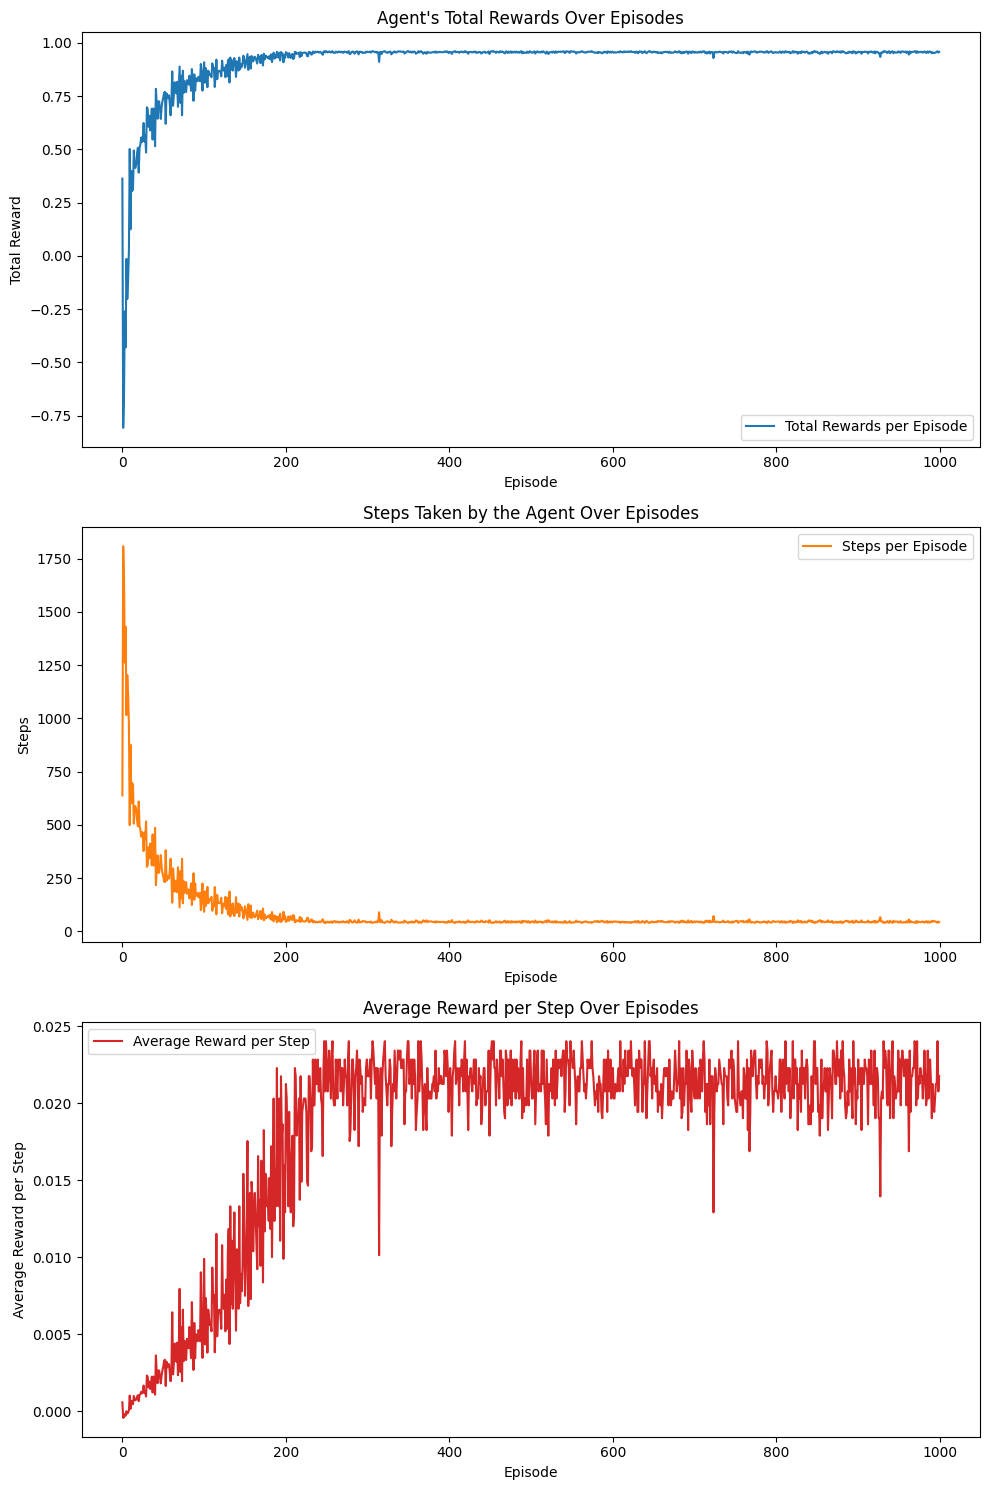

Overall success rate: 1.00


In [11]:
ACTION_MAPPING = {0: "N", 1: "E", 2: "S", 3: "W"}

class SARSA_Agent:
    def __init__(self, action_space_size, state_space_shape, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.q_table = np.zeros(state_space_shape + (action_space_size,))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.action_space_size = action_space_size

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.randint(0, self.action_space_size)
        else:
            action = np.argmax(self.q_table[state])
        return action

    def update(self, state, action, reward, next_state, next_action):
        predict = self.q_table[state + (action,)]
        target = reward + self.gamma * self.q_table[next_state + (next_action,)]
        self.q_table[state + (action,)] += self.alpha * (target - predict)

def run_episode(agent, env, episode):
    state = env.reset()
    state = (int(state[0]), int(state[1]))
    action = agent.choose_action(state)
    total_reward = 0
    steps = 0
    success = False

    while True:
        next_state, reward, done, _ = env.step(ACTION_MAPPING[action])
        next_state = (int(next_state[0]), int(next_state[1]))
        next_action = agent.choose_action(next_state)

        # Update the Q-table within the agent
        agent.update(state, action, reward, next_state, next_action)

        state, action = next_state, next_action
        total_reward += reward
        steps += 1

        if done:
            success = reward == 1  
            print(f"Episode {episode} - Steps: {steps}, Reward: {total_reward}, Success: {success}")
            break

    return total_reward, steps, success


def simulate():
    env = maze_env.MazeEnvRandom10x10(enable_render=False)
    agent = SARSA_Agent(action_space_size=env.action_space.n, state_space_shape=(10, 10))
    
    NUM_EPISODES = 1000
    total_rewards = []
    steps_per_episode = []
    average_rewards_per_step = []  # List to hold the average reward per step for each episode
    success_count = 0

    for episode in range(NUM_EPISODES):
        total_reward, steps, success = run_episode(agent, env, episode)
        total_rewards.append(total_reward)
        steps_per_episode.append(steps)
        average_rewards_per_step.append(total_reward / steps if steps > 0 else 0)  # Avoid division by zero
        success_count += success

    success_rate = success_count / NUM_EPISODES

    fig, axs = plt.subplots(3, 1, figsize=(10, 15))  

    axs[0].plot(total_rewards, label='Total Rewards per Episode')
    axs[0].set_xlabel('Episode')
    axs[0].set_ylabel('Total Reward')
    axs[0].set_title('Agent\'s Total Rewards Over Episodes')
    axs[0].legend()

    axs[1].plot(steps_per_episode, label='Steps per Episode', color='tab:orange')
    axs[1].set_xlabel('Episode')
    axs[1].set_ylabel('Steps')
    axs[1].set_title('Steps Taken by the Agent Over Episodes')
    axs[1].legend()

    axs[2].plot(average_rewards_per_step, label='Average Reward per Step', color='tab:red')
    axs[2].set_xlabel('Episode')
    axs[2].set_ylabel('Average Reward per Step')
    axs[2].set_title('Average Reward per Step Over Episodes')
    axs[2].legend()

    plt.tight_layout()
    plt.show()

    print(f"Overall success rate: {success_rate:.2f}")

if __name__ == "__main__":
    simulate()

Based on the graph, the agent's cumulative reward stabilized as episodes progressed, indicating that it was learning an efficient policy for maze navigation. 
- The number of steps taken to reach the goal sharply decreased, suggesting a rapid learning phase and subsequent refinement toward an optimal path. 
- However, the average reward per step exhibits fluctuations even in later episodes, which might imply room for further parameter optimization or the inherent stochasticity of the agent's exploration strategy. 
- This graphical representation captures the essence of the agent's learning trajectory, providing an intuitive understanding of the efficiency and adaptability of the SARSA algorithm in complex environments. 
- The final success rate computed provides a clear metric of achievement, serving as a comparative benchmark for future algorithmic evaluations.

## Variation 1 - Learning Rate Changes

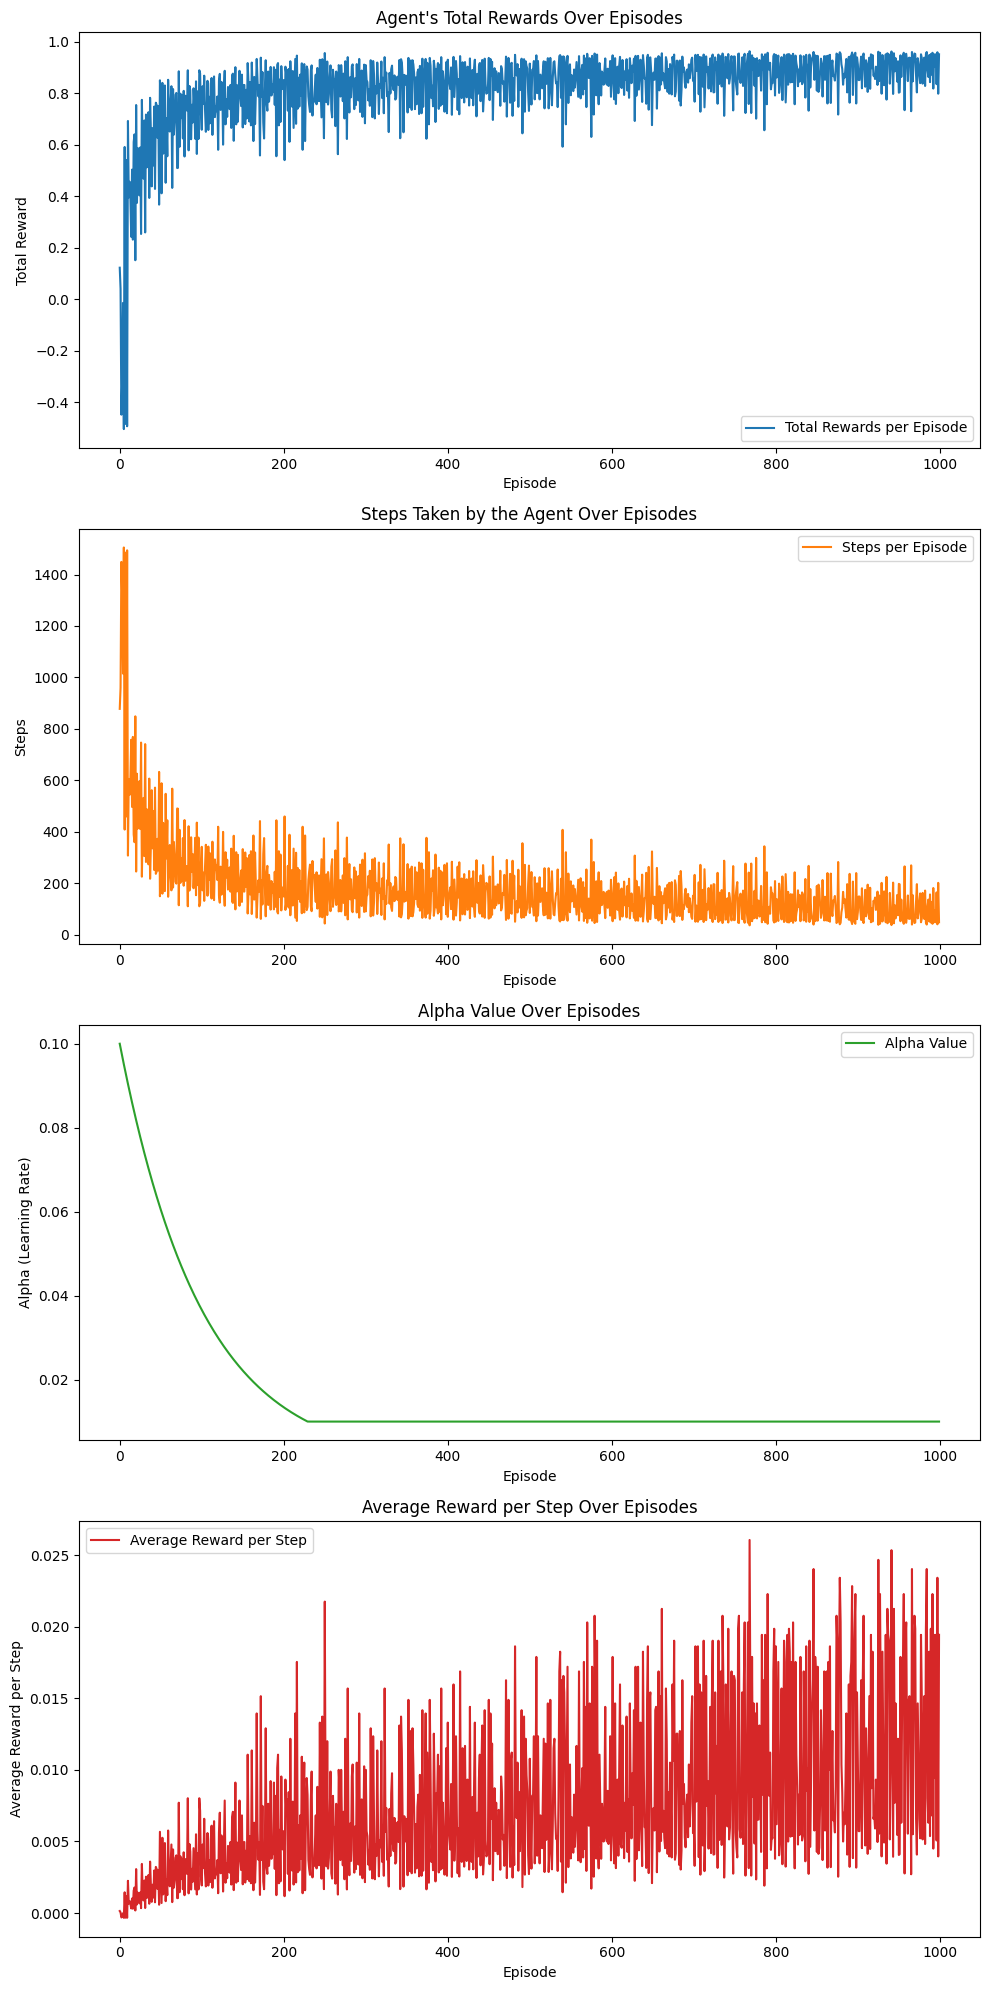

Overall success rate: 1.00


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import maze_env

ACTION_MAPPING = {0: "N", 1: "E", 2: "S", 3: "W"}

class SARSA_Agent_lr:
    def __init__(self, action_space_size, state_space_shape, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.q_table = np.zeros(state_space_shape + (action_space_size,))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.action_space_size = action_space_size
        self.initial_alpha = alpha  

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.randint(0, self.action_space_size)
        else:
            action = np.argmax(self.q_table[state])
        return action

    def update(self, state, action, reward, next_state, next_action):
        predict = self.q_table[state + (action,)]
        target = reward + self.gamma * self.q_table[next_state + (next_action,)]
        self.q_table[state + (action,)] += self.alpha * (target - predict)

    def update_learning_rate(self, episode, min_alpha=0.01, decay_rate=0.99):
        self.alpha = max(min_alpha, self.initial_alpha * (decay_rate ** episode))

def run_episode(agent, env, episode):
    state = env.reset()
    state = (int(state[0]), int(state[1]))
    action = agent.choose_action(state)
    total_reward = 0
    steps = 0
    success = False

    while True:
        next_state, reward, done, _ = env.step(ACTION_MAPPING[action])
        next_state = (int(next_state[0]), int(next_state[1]))
        next_action = agent.choose_action(next_state)

        agent.update(state, action, reward, next_state, next_action)

        state, action = next_state, next_action
        total_reward += reward
        steps += 1

        if done:
            success = reward == 1
            break

    return total_reward, steps, success

def simulate():
    env = maze_env.MazeEnvRandom10x10(enable_render=False)
    agent = SARSA_Agent_lr(action_space_size=env.action_space.n, state_space_shape=(10, 10))
    
    NUM_EPISODES = 1000
    total_rewards = []
    steps_per_episode = []
    successes = []
    alpha_values = []  # To record the alpha value over episodes

    for episode in range(NUM_EPISODES):
        agent.update_learning_rate(episode)  # Update the learning rate based on the decay
        alpha_values.append(agent.alpha)  # Record the updated alpha value

        total_reward, steps, success = run_episode(agent, env, episode)
        total_rewards.append(total_reward)
        steps_per_episode.append(steps)
        successes.append(success)

    success_rate = np.mean(successes)
    average_reward_per_step = [r / s if s != 0 else 0 for r, s in zip(total_rewards, steps_per_episode)]

    # Plot results
    fig, axs = plt.subplots(4, 1, figsize=(10, 20))

    axs[0].plot(total_rewards, label='Total Rewards per Episode')
    axs[0].set_xlabel('Episode')
    axs[0].set_ylabel('Total Reward')
    axs[0].set_title('Agent\'s Total Rewards Over Episodes')
    axs[0].legend()

    axs[1].plot(steps_per_episode, label='Steps per Episode', color='tab:orange')
    axs[1].set_xlabel('Episode')
    axs[1].set_ylabel('Steps')
    axs[1].set_title('Steps Taken by the Agent Over Episodes')
    axs[1].legend()

    axs[2].plot(alpha_values, label='Alpha Value', color='tab:green')
    axs[2].set_xlabel('Episode')
    axs[2].set_ylabel('Alpha (Learning Rate)')
    axs[2].set_title('Alpha Value Over Episodes')
    axs[2].legend()

    axs[3].plot(average_reward_per_step, label='Average Reward per Step', color='tab:red')
    axs[3].set_xlabel('Episode')
    axs[3].set_ylabel('Average Reward per Step')
    axs[3].set_title('Average Reward per Step Over Episodes')
    axs[3].legend()

    plt.tight_layout()
    plt.show()

    print(f"Overall success rate: {success_rate:.2f}")

if __name__ == "__main__":
    simulate()

-	**Total Rewards Over Episodes:** An initial rapid ascent in rewards that plateaus suggest the agent quickly learns to navigate the maze and maintains a consistent strategy thereafter.
-	**Steps per Episode:** The marked decrease in steps required to complete the maze indicates a swift improvement in path efficiency, with a subsequent gradual decline hinting at the refinement of the agent's policy.
-	**Alpha Value Decay:** The learning rate diminishes as expected, supporting a gradual shift from exploration to exploitation and safeguarding against excessive adjustments in the agent's later experiences.
-	**Average Reward per Step:** Despite overall progress, the variable rewards per step point to inconsistencies in the agent's performance, signalling potential areas for further optimization of the learning parameters.


## Variation 2 - Exploration Rate Changes

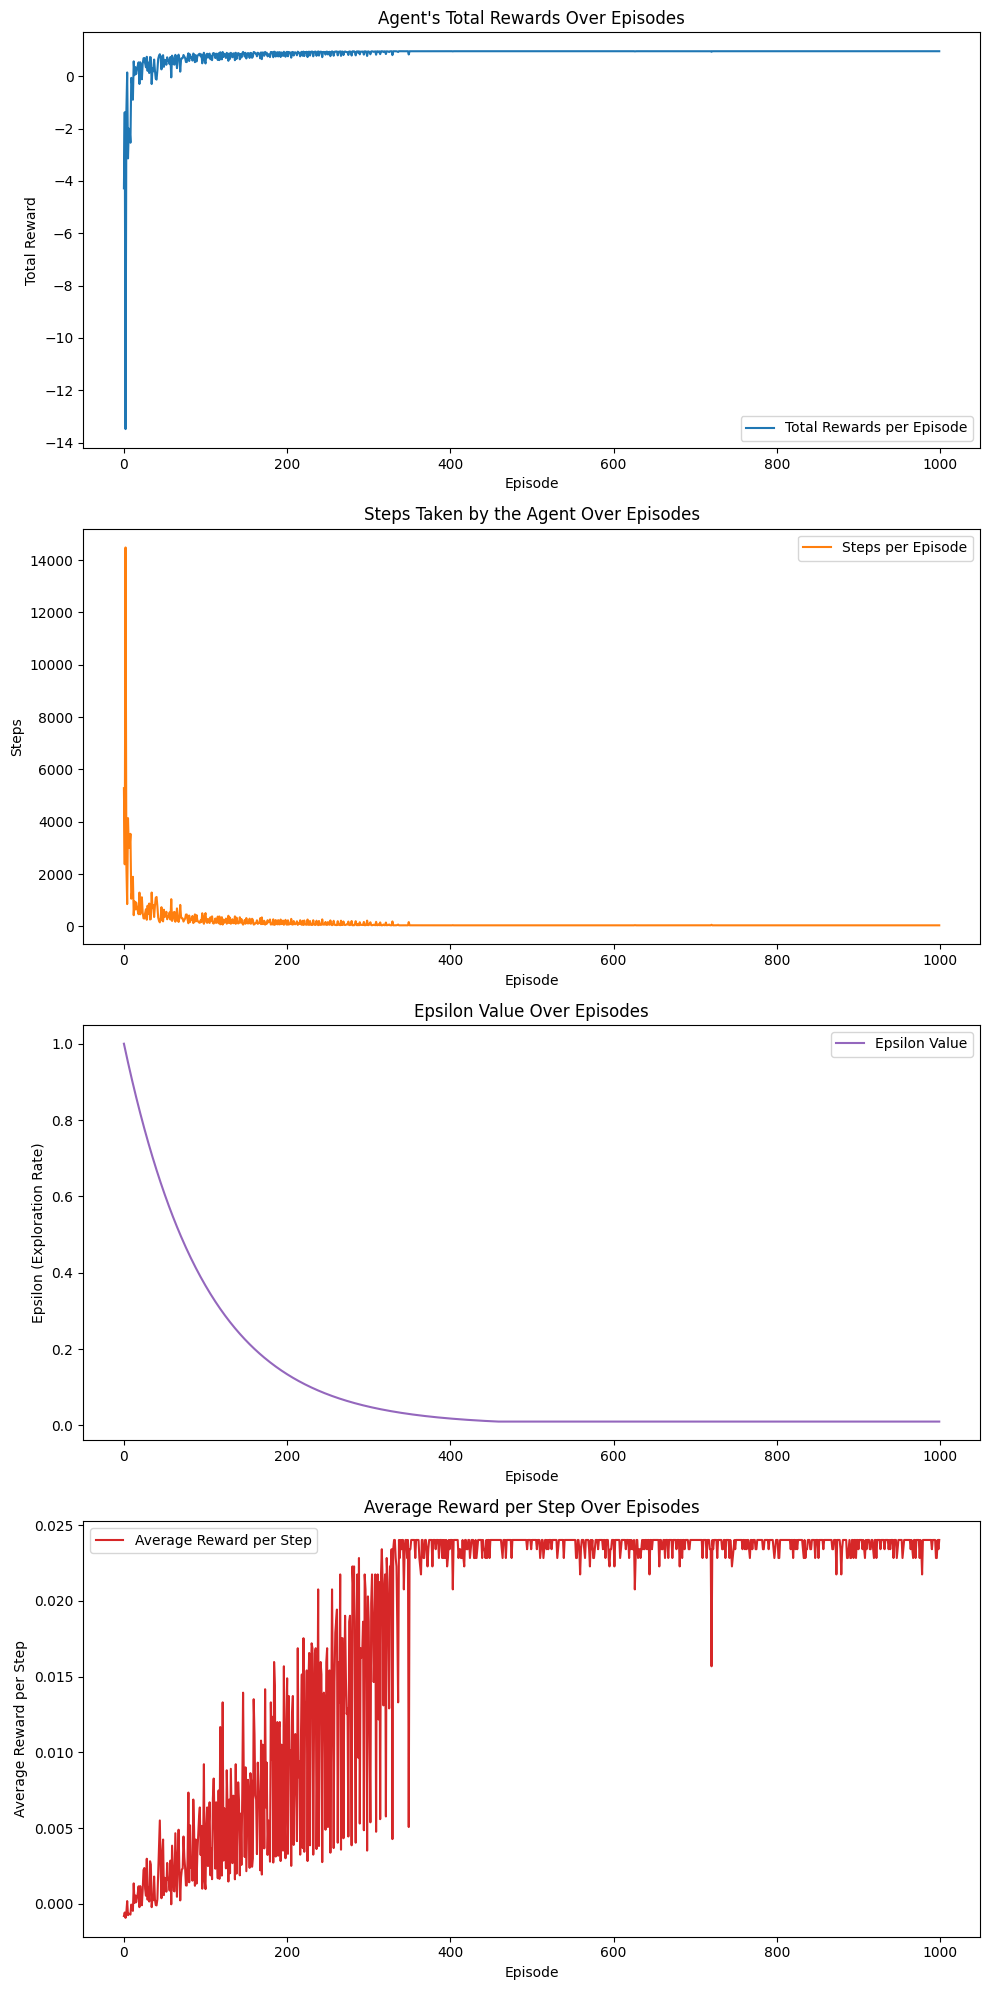

Overall success rate: 1.00


In [13]:
class SARSA_Agent_Exploration:
    def __init__(self, action_space_size, state_space_shape, alpha=0.1, gamma=0.99, epsilon=1.0):
        self.q_table = np.zeros(state_space_shape + (action_space_size,))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.action_space_size = action_space_size
        self.initial_epsilon = epsilon 

    def choose_action_exploration(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.randint(0, self.action_space_size)
        else:
            action = np.argmax(self.q_table[state])
        return action

    def update_exploration(self, state, action, reward, next_state, next_action):
        predict = self.q_table[state + (action,)]
        target = reward + self.gamma * self.q_table[next_state + (next_action,)]
        self.q_table[state + (action,)] += self.alpha * (target - predict)

    def update_exploration_rate(self, episode, min_epsilon=0.01, decay_rate=0.99):
        self.epsilon = max(min_epsilon, self.initial_epsilon * (decay_rate ** episode))

def run_episode(agent, env, episode):
    state = env.reset()
    state = (int(state[0]), int(state[1]))
    action = agent.choose_action_exploration(state)
    total_reward = 0
    steps = 0
    success = False

    while True:
        next_state, reward, done, _ = env.step(ACTION_MAPPING[action])
        next_state = (int(next_state[0]), int(next_state[1]))
        next_action = agent.choose_action_exploration(next_state)

        agent.update_exploration(state, action, reward, next_state, next_action)

        state, action = next_state, next_action
        total_reward += reward
        steps += 1

        if done:
            success = reward > 0  
            break

    return total_reward, steps, success

def simulate():
    env = maze_env.MazeEnvRandom10x10(enable_render=False)
    agent = SARSA_Agent_Exploration(action_space_size=env.action_space.n, state_space_shape=(10, 10))
    
    NUM_EPISODES = 1000
    total_rewards = []
    steps_per_episode = []
    epsilon_values = []
    successes = []

    for episode in range(NUM_EPISODES):
        agent.update_exploration_rate(episode)
        epsilon_values.append(agent.epsilon)
        
        total_reward, steps, success = run_episode(agent, env, episode)
        total_rewards.append(total_reward)
        steps_per_episode.append(steps)
        successes.append(success)

    success_rate = sum(successes) / NUM_EPISODES
    average_reward_per_step = [r / s if s != 0 else 0 for r, s in zip(total_rewards, steps_per_episode)]

    # Plotting the results
    fig, axs = plt.subplots(4, 1, figsize=(10, 20))

    axs[0].plot(total_rewards, label='Total Rewards per Episode')
    axs[0].set_xlabel('Episode')
    axs[0].set_ylabel('Total Reward')
    axs[0].set_title('Agent\'s Total Rewards Over Episodes')
    axs[0].legend()

    axs[1].plot(steps_per_episode, label='Steps per Episode', color='tab:orange')
    axs[1].set_xlabel('Episode')
    axs[1].set_ylabel('Steps')
    axs[1].set_title('Steps Taken by the Agent Over Episodes')
    axs[1].legend()

    axs[2].plot(epsilon_values, label='Epsilon Value', color='tab:purple')
    axs[2].set_xlabel('Episode')
    axs[2].set_ylabel('Epsilon (Exploration Rate)')
    axs[2].set_title('Epsilon Value Over Episodes')
    axs[2].legend()

    axs[3].plot(average_reward_per_step, label='Average Reward per Step', color='tab:red')
    axs[3].set_xlabel('Episode')
    axs[3].set_ylabel('Average Reward per Step')
    axs[3].set_title('Average Reward per Step Over Episodes')
    axs[3].legend()

    plt.tight_layout()
    plt.show()

    print(f"Overall success rate: {success_rate:.2f}")

if __name__ == "__main__":
    simulate()

-	**Total Rewards Over Episodes:** Following initial fluctuations, the rewards level out, indicating that the agent transitions from exploring the maze to efficiently exploiting known paths.
-	**Steps Taken by the Agent Over Episodes:** The rapid decline in steps suggests swift learning, with a plateau hinting at an eventual mastery of the maze layout.
-	**Epsilon Value Over Episodes:** The exploration rate steadily declines, signalling a strategic shift from random exploration to exploiting the learned policy.
-	**Average Reward per Step Over Episodes:** The consistent climb in average reward per step reflects an increase in the agent’s navigational efficiency, even as the rate of exploration decreases.


## Variation 3 - Discount Factor Changes

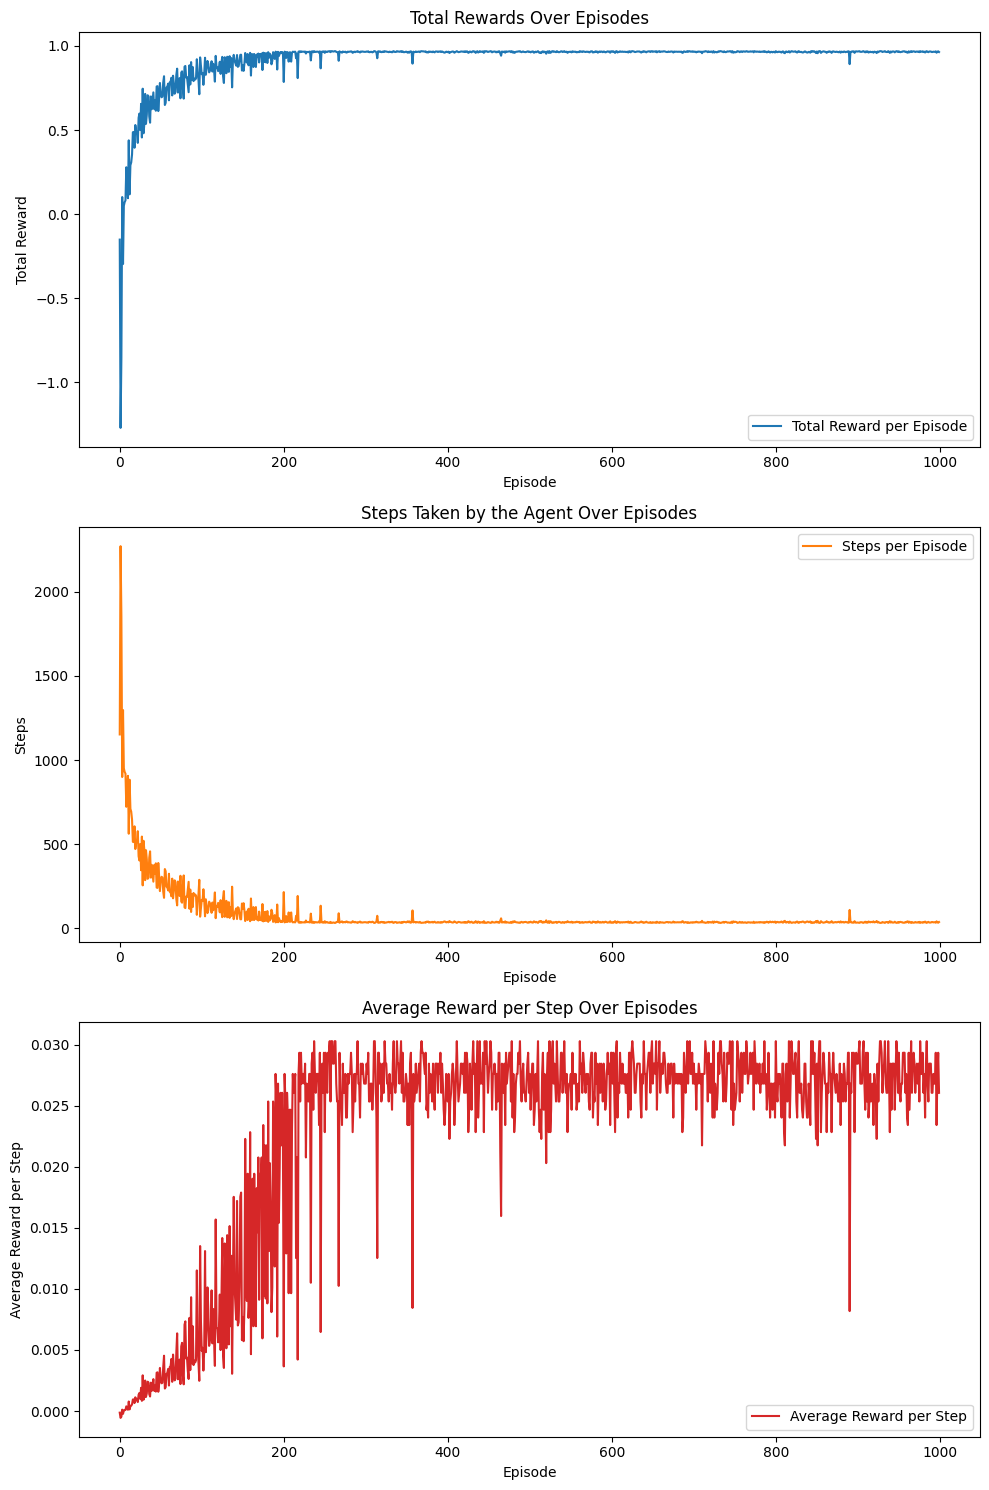

In [14]:
ACTION_MAPPING = {0: "N", 1: "E", 2: "S", 3: "W"}

class SARSA_Agent_gamma:
    def __init__(self, action_space_size, state_space_shape, alpha, gamma, epsilon):
        self.q_table = np.zeros(state_space_shape + (action_space_size,))
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.action_space_size = action_space_size

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.action_space_size)
        return np.argmax(self.q_table[state])

    def update(self, state, action, reward, next_state, next_action):
        predict = self.q_table[state + (action,)]
        target = reward + self.gamma * self.q_table[next_state + (next_action,)]
        self.q_table[state + (action,)] += self.alpha * (target - predict)

def run_episode(agent, env):
    state = env.reset()
    state = (int(state[0]), int(state[1]))
    action = agent.choose_action(state)
    total_reward, steps = 0, 0
    while True:
        next_state, reward, done, _ = env.step(ACTION_MAPPING[action])
        next_state = (int(next_state[0]), int(next_state[1]))
        next_action = agent.choose_action(next_state)
        agent.update(state, action, reward, next_state, next_action)
        state, action = next_state, next_action
        total_reward += reward
        steps += 1
        if done:
            break
    return total_reward, steps

def simulate(agent, env, num_episodes=1000):
    rewards, steps_list = [], []

    for episode in range(num_episodes):
        total_reward, steps = run_episode(agent, env)
        rewards.append(total_reward)
        steps_list.append(steps)

    # Calculate average reward per step
    average_reward_per_step = [reward / steps if steps != 0 else 0 for reward, steps in zip(rewards, steps_list)]

    # Plotting
    episodes = np.arange(num_episodes)
    plt.figure(figsize=(10, 15))

    plt.subplot(3, 1, 1)
    plt.plot(episodes, rewards, label='Total Reward per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Total Rewards Over Episodes')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(episodes, steps_list, label='Steps per Episode', color='tab:orange')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps Taken by the Agent Over Episodes')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(episodes, average_reward_per_step, label='Average Reward per Step', color='tab:red')
    plt.xlabel('Episode')
    plt.ylabel('Average Reward per Step')
    plt.title('Average Reward per Step Over Episodes')
    plt.legend()

    plt.tight_layout()
    plt.show()
# Initialize agents with specified gamma factor
agent_low_gamma = SARSA_Agent_gamma(env.action_space.n, (10, 10), alpha=0.1, gamma=0.5, epsilon=0.1)

# Run simulation
simulate(agent_low_gamma, env)

-	**Total Rewards Over Episodes:** The graph shows an uptrend towards a stable reward level after initial episodes, which typically reflects the learning curve of the agent as it masters the environment.
-	**Steps Taken by the Agent Over Episodes:** We see a sharp decrease in the number of steps the agent takes to reach the goal, indicating an improvement in finding a shorter path as the episodes progress. A plateau in steps suggests that the agent may have found an efficient route.
-	**Average Reward per Step Over Episodes:** The reward per step increases initially and then exhibits variability while maintaining an overall upward trend. This fluctuation may represent the agent's continued exploration and learning, despite the converging behaviour suggested by the total reward and step count metrics.
